## Set path

First, define the PYTHONPATH variable appropriately

In [1]:
import sys 
sys.path.append('/home/pierre-edouard/Desktop/ICL/Git_LHCb')

import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3' 


## Signal generation

Now, create a toy and generate 100000 events following the desired model ('SM' & 'NP')

In [2]:
import numpy as np 
import matplotlib.pyplot as plt
from scipy import stats
from scipy import interpolate
import time 
from tqdm import tqdm
import csv 

import b_meson_fit.signal as bmfs  
import b_meson_fit as bmf 
from toy_minuit import toy
from test_iminuit import amplitude_latex_names ,amplitude_names, LaTex_labels , Standard_labels  , fix_array , fix_alphas , fix_one_alpha , fix_alpha_beta  ,fix_alpha_beta_gamma5


N_events=100000
frac_bck=0.2
CoeffBCK0 = [
    [0.,100.],
    [0.,100.],
    [0.,100.],
    [0.,100.]
]

CoeffBCK1 = [
    [200.,-100.],
    [200,-100.],
    [200,-100.],
    [200,-100.]
]

#create toys
toySM=toy('SM')
toyNP=toy('NP')
toyMIX=toy('SM')
 
#initial coefficients 
A_SM=bmf.coeffs.fit(bmf.coeffs.fit_initialization_scheme_default , current_signal_model=toySM.model)
CoeffSM=[A_SM[i].numpy() for i in range(len(A_SM))]

A_NP=bmf.coeffs.fit(bmf.coeffs.fit_initialization_scheme_default , current_signal_model=toyNP.model)
CoeffNP=[A_NP[i].numpy() for i in range(len(A_NP))]

#print(CoeffSM)
#print(CoeffNP)

#generate N_events for both models  
toySM.generate(events=N_events , verbose=True)
toyNP.generate(events=N_events , verbose=True)
toyMIX.generate(events=N_events , frac_background = frac_bck, coeff_background = CoeffBCK0)



#print(toySM.events)

Ideal coeffs for  SM  :  [-4.1781025, -0.15184344, 6.8183246, 0.008585378, -0.0018230017, 0.4660742, -0.23538125, -0.0043176315, 8.003745, 0.16564202, -0.013095878, -0.30668017, 3.8864067, 0.08526551, -8.197446, -0.09505176, 0.007934013, -0.07297003, -0.4235836, 0.027298994, -7.147451, 0.0, 0.0, 0.0, 7.202759, -0.2278163, 9.89863, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0]
Time taken to generate data: 8.18251919746399
Ideal coeffs for  NP  :  [-3.4277496, -0.12410027, 6.045281, 0.009340614, -0.0019891937, 0.50341135, -0.25086978, -0.005180213, 8.636745, 0.22209263, -0.017419353, -0.5280673, 3.0646408, 0.078515366, -8.841145, -0.113660336, 0.00929356, -0.047615465, -0.933267, 0.016867112, -6.3185554, 0.0, 0.0, 0.0, 5.882883, -0.18442497, 8.101398, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0]
Time taken to generate data: 8.24886441230774


AttributeError: 'list' object has no attribute 'flatten'

## Plotting angular observables  (no background)

Plot the different angular observables and the mass of the $K\pi\mu\mu$ system 

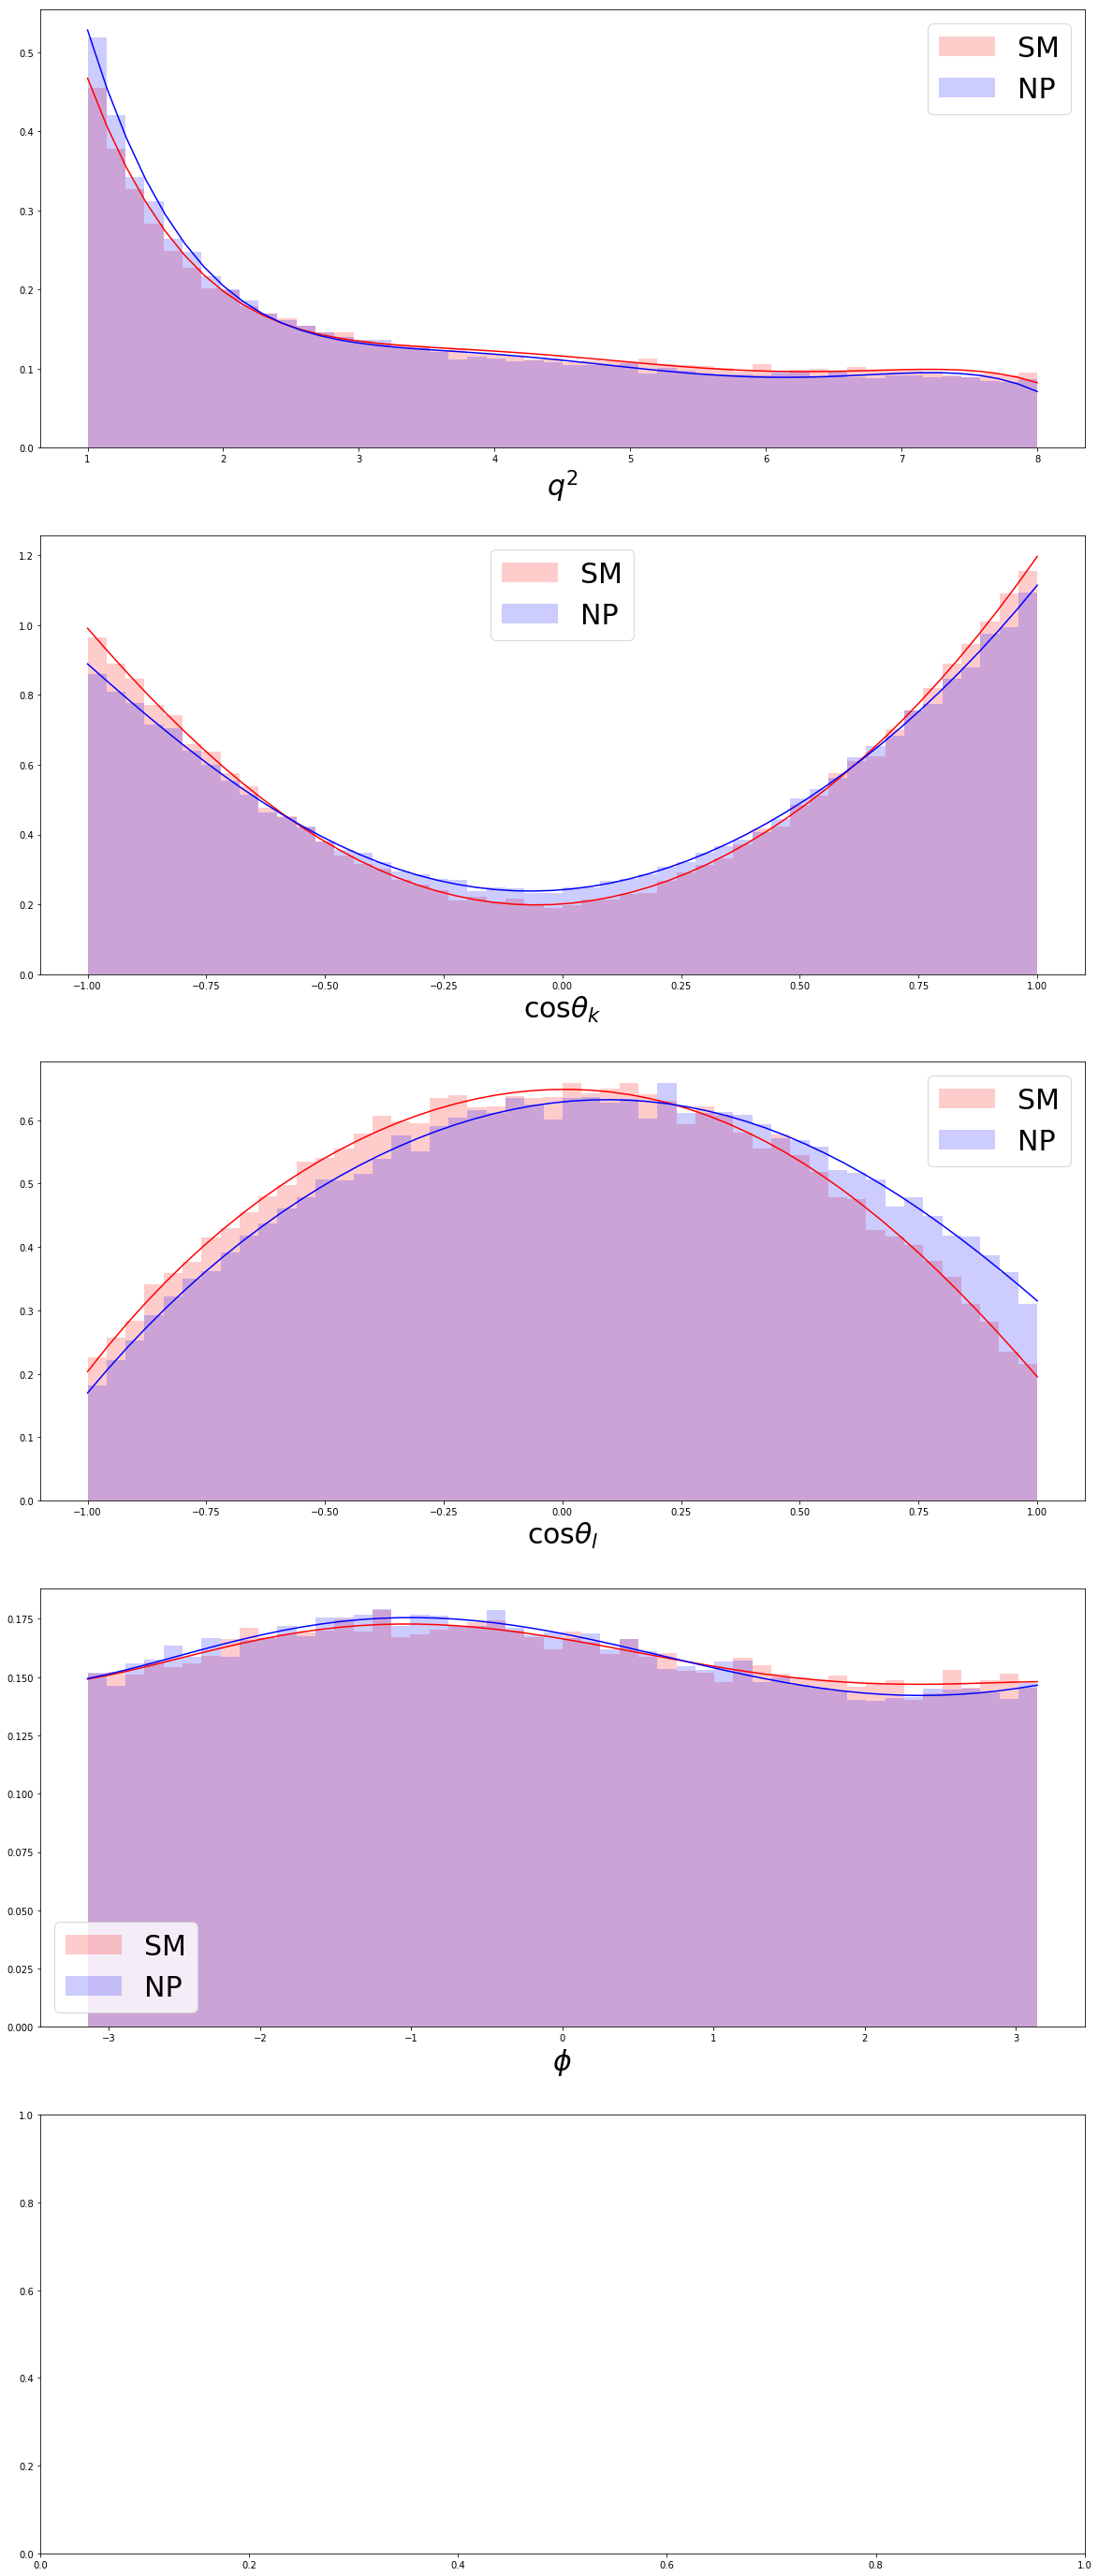

In [5]:
from scipy.interpolate import UnivariateSpline
from scipy.interpolate import interp1d


plt.rcParams["figure.figsize"] = (20,50)
fig , ax = plt.subplots( 5 , 1)
n_bins=50
Alpha=0.2

labels=[r'$q^{2}$' , r'cos$\theta_{k}$' , r'cos$\theta_{l}$' , r'$\phi$' ]


#Plot angular observables for SM & NP + interpolation
for j in range(4):
    
    #SM
    n , bins, patches= ax[j].hist(toySM.events[:,j] , bins=n_bins , density=True , color='red' , alpha=Alpha , label='SM')
    centers_SM = 0.5*(bins[1:]+ bins[:-1])
    s_SM = np.polyfit(centers_SM, n , 5)
    p_SM = np.poly1d(s_SM)
    
    #NP 
    n , bins, patches= ax[j].hist(toyNP.events[:,j] , bins=n_bins , density=True , color='blue' , alpha=Alpha , label='NP')
    centers_NP = 0.5*(bins[1:]+ bins[:-1])
    s_NP = np.polyfit(centers_NP, n , 5)
    p_NP = np.poly1d(s_NP)
    
    x=np.linspace(min(bins),max(bins))
    
    #plot the whole thing 
    ax[j].plot(x , p_SM(x) , color= 'red')
    ax[j].plot(x , p_NP(x) , color= 'blue')
    
    ax[j].set_xlabel(labels[j] , fontsize=30)
    ax[j].legend(fontsize=30)
    

plt.show()

## Testing the background sampling  

Few plots of the distribution of angular observables sampled from our background pdfs

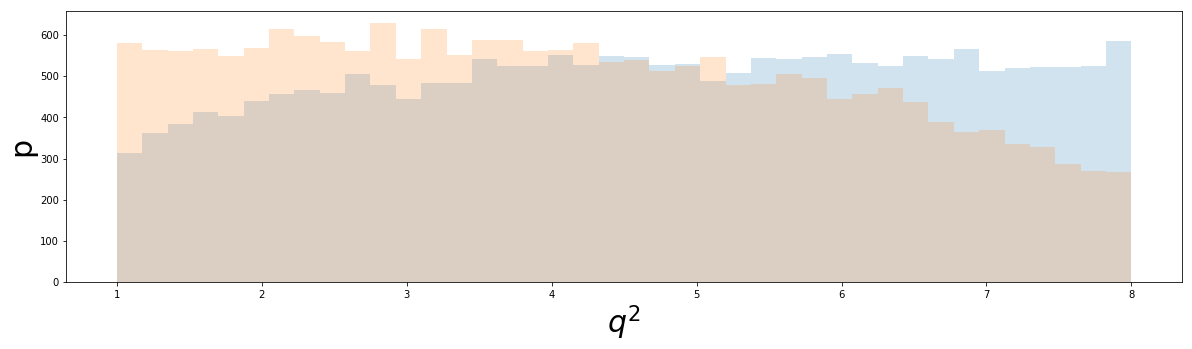

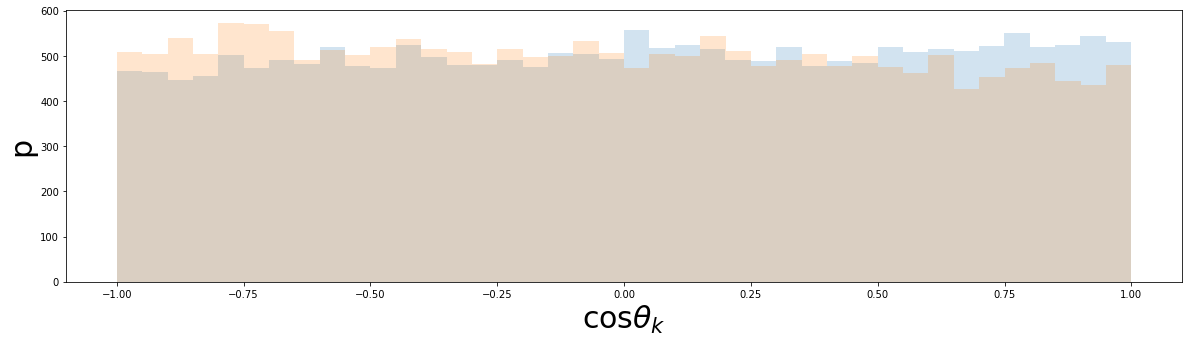

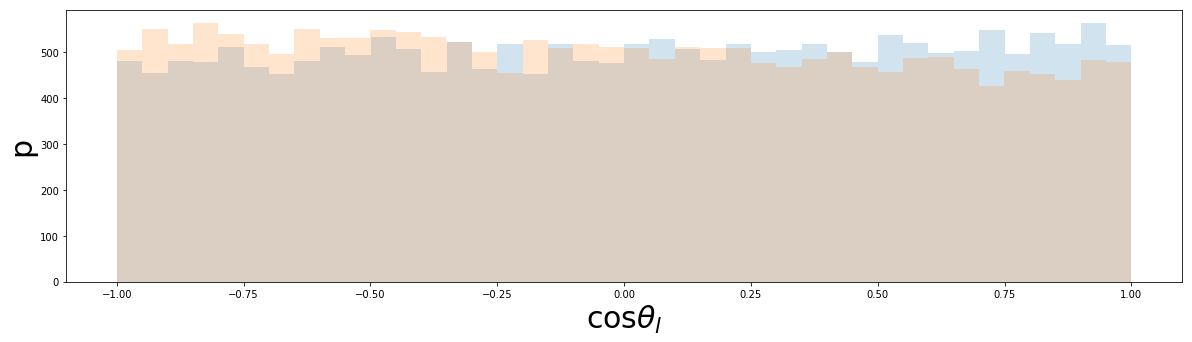

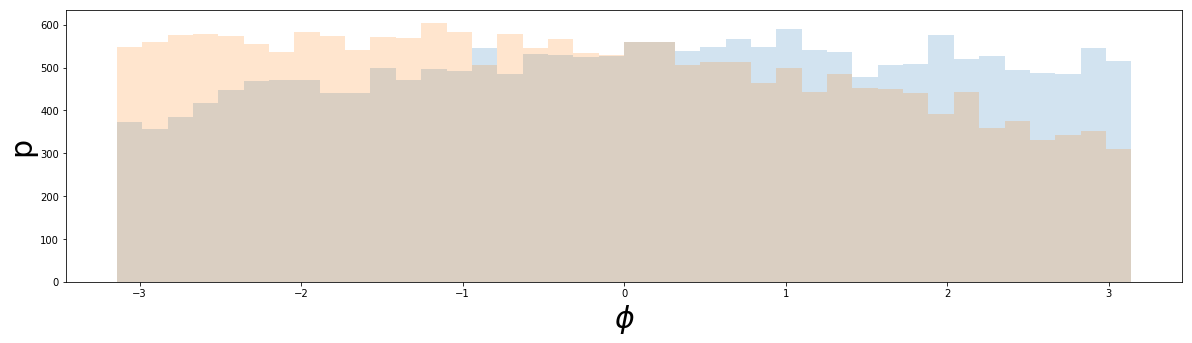

In [7]:
from b_meson_fit.signal import decay_rate 
from b_meson_fit.signal import generate_background 

CoeffBCK0 = [
    [0.,100.],
    [0.,100.],
    [0.,100.],
    [0.,100.]
]

CoeffBCK1 = [
    [200.,-100.],
    [200,-100.],
    [200,-100.],
    [200,-100.]
]

plt.rcParams["figure.figsize"] = (20,5)
n_bins=40

events_bck0 = generate_background(CoeffBCK0 , events_total=20000)
events_bck1 = generate_background(CoeffBCK1 , events_total=20000)

for j in range(4):
    ax=plt.gca()
    plt.hist(events_bck0[:,j] , bins=n_bins , alpha=0.2)
    plt.hist(events_bck1[:,j] , bins=n_bins , alpha=0.2)
    ax.set_xlabel(labels[j] , fontsize=30 )
    ax.set_ylabel('p' , fontsize=30 )
    plt.show()

## Plotting angular observables  (background included)

Plot the different angular observables and the mass of the $K\pi\mu\mu$ system with background events this time, sampled from linear pdfs. 



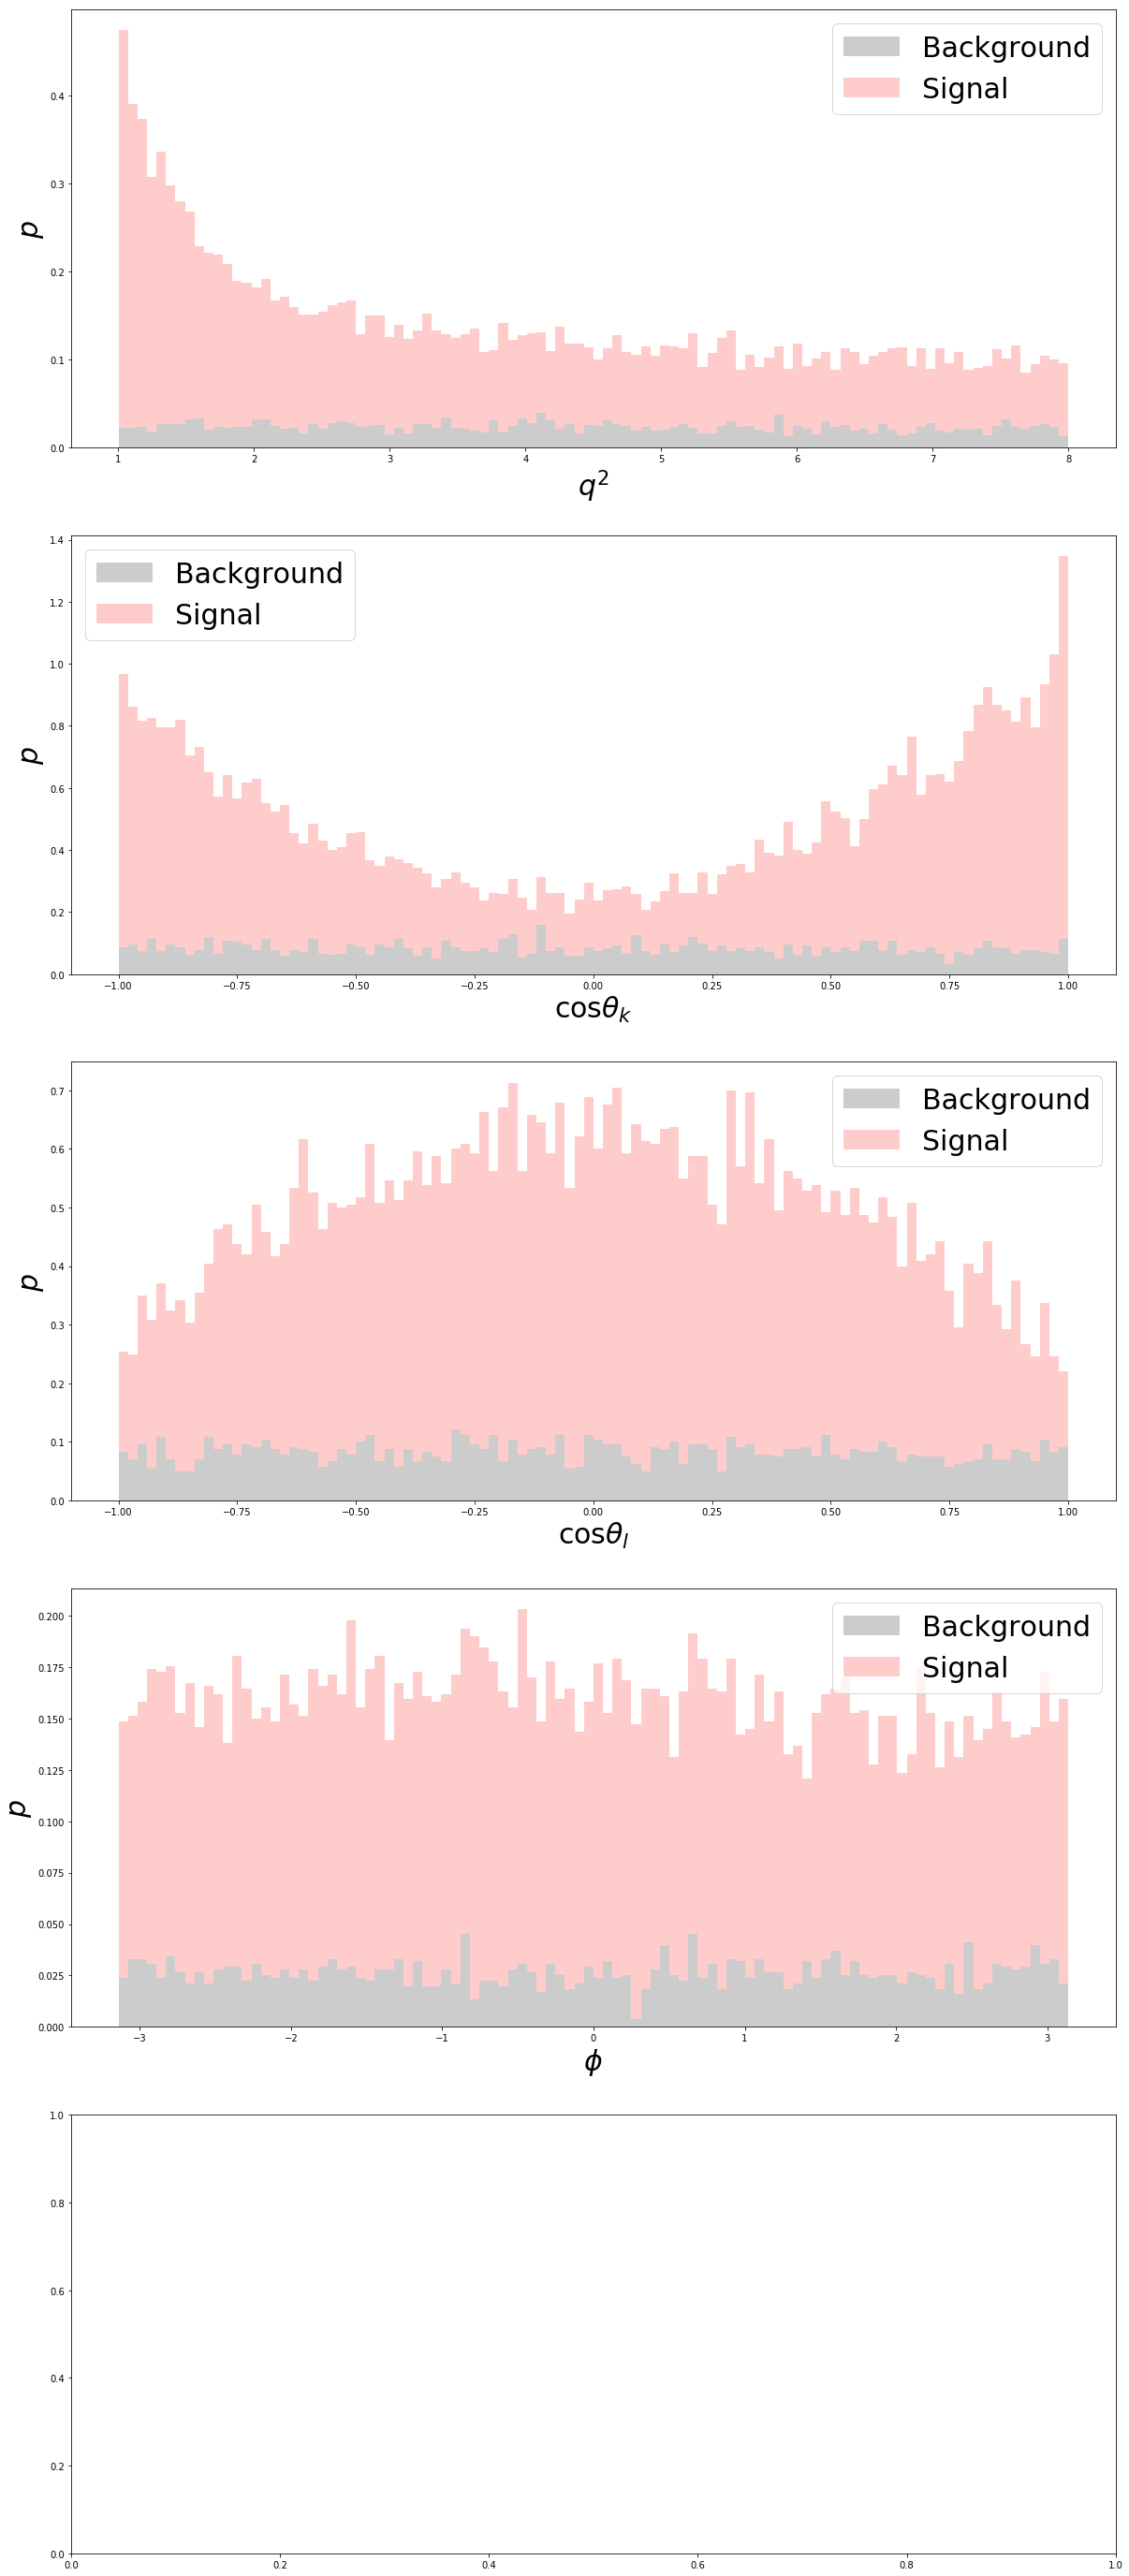

In [9]:
from b_meson_fit.signal import generate_background
from b_meson_fit.signal import generate

import b_meson_fit.signal as bmfs 
import b_meson_fit as bmf 

import tensorflow as tf 
plt.rcParams["figure.figsize"] = (20,50)


nbins=100
CoeffBCK = [
    [100.,100.],
    [100.,100.],
    [100.,100.],
    [100.,100.]
]

bck = generate_background(CoeffBCK, events_total=2_000, batch_size=1_000_000)
signal =  generate(CoeffSM, events_total=10_000, batch_size=1_000_000)
mix = tf.concat([bck , signal] , 0)

fig , ax = plt.subplots( 5 , 1)

for j in range(4):
    ax[j].hist(  (bck[:,j] , signal[:,j])
             , bins=nbins 
             , stacked=True
             , density=True
             , color= ['black' , 'red' ]
             , label= ['Background' , 'Signal']
             , alpha=0.2)
    '''
    ax[j].hist(  bck[:,j] 
             , bins=nbins 
             , density=True
             , color= 'black'
             , label= 'Background' 
             , alpha=0.2)
    '''

    ax[j].set_xlabel(labels[j] , fontsize=30)
    ax[j].set_ylabel(r'$p$' , fontsize=30)
    ax[j].legend(fontsize=30)

plt.show()

    


## Fitting for signal only ( SM & NP )

- only alphas varying 
- alphas and betas varying 
- alphas and gammas varying 
- all parameters varying 



In [10]:
A=[]
for j in tqdm(range(100)):
    optimizer , coeffs =toySM.tf_fit(init= 'SAME SIGN' , fixed=fix_one_alpha)
    A.append(coeffs)


100%|██████████| 100/100 [08:08<00:00,  5.00s/it]


In [11]:
A=np.asarray(A)
for j in range(len(A[0])):
    if fix_alphas[j]==0:
        print(np.mean(A[:,j]) , 'pm' , np.std(A[:,j]))

-4.160913 pm 0.12259524
0.0085853785 pm 9.313226e-10
-0.23538125 pm 0.0
0.16564201 pm 1.4901161e-08
3.8864067 pm 0.0
-0.09505176 pm 0.0
-0.42358357 pm 2.9802322e-08
7.148617 pm 0.16665995
1.0 pm 0.0
1.0 pm 0.0
1.0 pm 0.0
1.0 pm 0.0


(array([ 1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  3.,  5., 16., 62.,  5.,
         3.,  1.,  1.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  1.]),
 array([-5.13413572, -5.10776608, -5.08139644, -5.05502679, -5.02865715,
        -5.00228751, -4.97591786, -4.94954822, -4.92317858, -4.89680893,
        -4.87043929, -4.84406965, -4.8177    , -4.79133036, -4.76496072,
        -4.73859107, -4.71222143, -4.68585179, -4.65948215, -4.6331125 ,
        -4.60674286, -4.58037322, -4.55400357, -4.52763393, -4.50126429,
        -4.47489464, -4.448525  , -4.42215536, -4.39578571, -4.36941607,
        -4.34304643, -4.31667678, -4.29030714, -4.2639375 , -4.23756785,
        -4.21119821, -4.18482857, -4.15845892, -4.13208928, -4.10571964,
        -4.07934999, -4.05298035, -4.02661071, -4.00024107, -3.97387142,
        -3.94750178, -3.92113214, -3.89476249, -3.86839285,

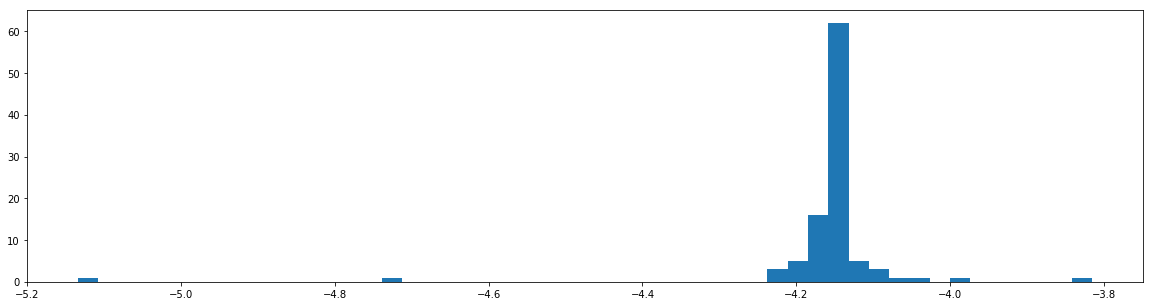

In [17]:
plt.rcParams["figure.figsize"] = (20,5)

plt.hist(A[:,0] , bins=50)


In [15]:
print(A[:,0])

[-4.148828  -4.1554017 -4.146852  -4.150362  -4.1276374 -4.096886
 -4.147189  -4.1501374 -4.1378007 -4.15028   -4.1505356 -4.127638
 -4.149575  -4.147511  -4.169735  -4.147058  -4.1502614 -4.144619
 -4.1523824 -4.1443796 -4.1394625 -4.134529  -4.1608753 -4.160217
 -4.07445   -4.1438437 -4.161678  -3.9779847 -4.169125  -4.144543
 -4.1421676 -4.1361117 -4.147242  -4.1889815 -4.1572776 -4.146269
 -4.1107955 -4.1741204 -4.1493835 -4.1433163 -4.148172  -4.1494517
 -4.099573  -3.8156536 -4.1914473 -4.152438  -4.162375  -4.1524878
 -4.1372313 -4.2300606 -4.218647  -4.1358776 -4.0412645 -4.1440096
 -4.1512322 -4.1862106 -4.1538095 -4.161035  -4.1606326 -4.7341347
 -4.149779  -4.1403594 -4.148771  -4.1468787 -4.1430407 -4.1499243
 -4.147771  -4.1463537 -4.1409845 -4.157785  -4.148906  -4.147593
 -4.14917   -4.134486  -4.148722  -4.197196  -4.152462  -4.148776
 -4.147805  -4.22115   -4.15951   -4.1145988 -4.10115   -4.1511135
 -4.142663  -4.163342  -4.2087665 -4.180467  -4.1416206 -4.15046
 -4.1

(array([33693., 34422., 15727.,  7409.,  4107.,  2390.,  1308.,   666.,
          236.,    42.]),
 array([3.02459412e-05, 6.37816777e-03, 1.27260896e-02, 1.90740114e-02,
        2.54219333e-02, 3.17698551e-02, 3.81177769e-02, 4.44656988e-02,
        5.08136206e-02, 5.71615424e-02, 6.35094643e-02]),
 <a list of 10 Patch objects>)

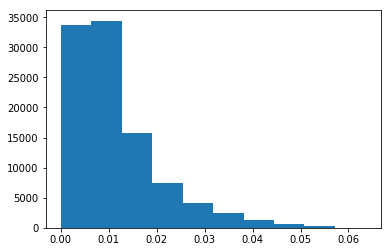

In [5]:
import b_meson_fit.signal as bmfs
A=bmfs.pdf(CoeffSM , toySM.events )

plt.hist(A)